In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# values from tables.docx
phi = 0.1 #interaction strength
mu = 1.0 #resource affinity parameter
eps = 0.3 #transfer efficiency
m_p = 0.1 #producer mortality
m_c = 0.1 #consumer mortality


S_R = 0.5#resource supply

#S_R = (m_p*m_c)/(eps*phi)

##dR = S_R - sum(mu*R*P) #dR/dt
##dP = (mu*R*P) - (phi*P*C) - (m_p*P) #dP/dt
##dC = sum(eps*phi*P*C) - (m_c*C) #dC/dt

In [3]:
#steady-state solutions #1 
R1 = (m_p/mu)
P1 = S_R/m_p
C1 = 0
print('('+ str(R1) + ',' + str(P1) + ',' + str(C1) + ')')

(0.1,5.0,0)


In [4]:
#steady-state solutions #2
R2 = (S_R*eps*phi)/(mu*m_c)
P2 = m_c/(eps*phi)
C2 = ((S_R*eps)/m_c)-(m_p/phi)
print('('+ str(R2) + ',' + str(P2) + ',' + str(C2) + ')')

(0.15,3.3333333333333335,0.4999999999999998)


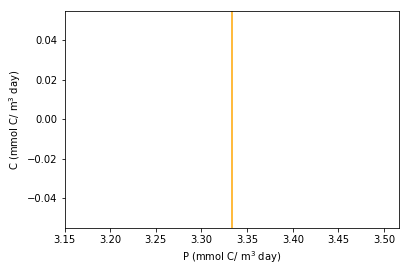

In [5]:
#plot steady states P versus C
plt.rc_context({'axes.edgecolor':'black'})
plt.plot(P2,C1)
plt.axvline(P2,C1,color='orange')
plt.xlabel('P (mmol C/ m$^{3}$ day)', color = 'k')
plt.ylabel('C (mmol C/ m$^{3}$ day)', color = 'k')



plt.rc('font', size=14)          # controls default text sizes
plt.rc('axes', titlesize=14)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels


plt.savefig('1prod_compare_hatton.png')


In [6]:
# differential  equation
def f(P):
    return  (mu*R[i-1]*P) - (phi*P*C[i-1]) - (m_p*P)
def g(R):
    return S_R - (mu*R*P[i-1])
def h(C):
    return (eps*phi*P[i-1]*C) - (m_c*C)

# define  initial  condition
P0 = 2
R0 = 2
C0 = 2
# time  step
dt = 0.04
# time change (discrete time)
T = 10
t = np.linspace(0, T, int(T/dt))
# array  to store  the  solution
P = np.zeros(len(t))
R = np.zeros(len(t))
C = np.zeros(len(t))
# Euler’s method
P[0] = P0
R[0] = R0
C[0] = C0
for i in  range(1, len(t)):
    P[i] = P[i-1] + f(P[i -1])* dt
    R[i] = R[i-1] + g(R[i -1])* dt
    C[i] = C[i-1] + h(C[i -1])* dt

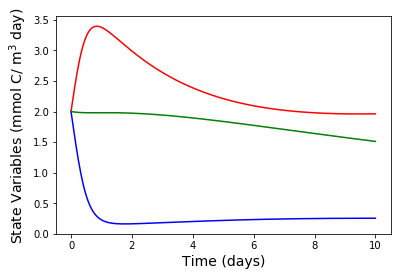

In [7]:
plt.rc_context({'axes.edgecolor':'black'})
plt.figure()
plt.plot(t,P, 'r')
plt.plot(t,R,'b')
plt.plot(t,C, 'g')
plt.xlabel('Time (days)')
plt.ylabel('State Variables (mmol C/ m$^{3}$ day)')

plt.savefig('1prod_highsr.png')

In [104]:
# resource supply worked out
S_R1 = (m_p*m_c)/(eps*phi)
print(S_R1)

0.3333333333333334


(0, 4)

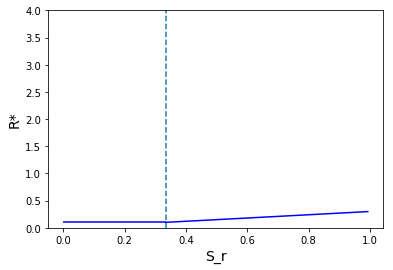

In [105]:
#S_R in relation to R*

#from zero to S_R graph R1, from S_R to 1 graph R2

plt.axvline(S_R1, linestyle='--')

R2 = []
S_R = []
for resource in np.arange(S_R1,1,0.01):
    Rloc = (resource*eps*phi)/(mu*m_c)
    R2.append(Rloc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,R2,'blue')
plt.hlines(R1,0,S_R,'blue')
plt.xlabel('S_r')
plt.ylabel('R*')
plt.ylim(0,4)

(0, 4)

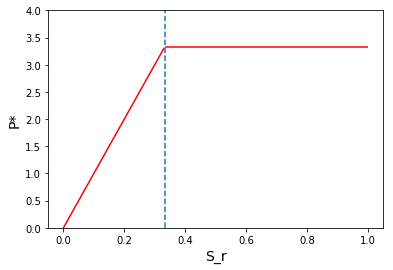

In [106]:
#S_R in relation to P*

#from zero to S_R graph P1, from S_R to 1 graph P2

plt.axvline(S_R1,linestyle='--')

P1 = []
S_R = []
for resource in np.arange(0,S_R1,0.01):
    Ploc = resource/m_p
    P1.append(Ploc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,P1,'red')
plt.hlines(P2,S_R1,1,'red')
plt.xlabel('S_r')
plt.ylabel('P*')
plt.ylim(0,4)

(0, 4)

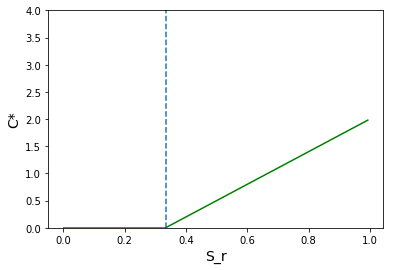

In [107]:
#S_R in relation to C*

#from zero to S_R graph C1, from S_R to 1 graph C2
            
plt.axvline(S_R1,linestyle='--')

C2 = []
S_R = []
for resource in np.arange(S_R1,1,0.01):
    Cloc = ((resource*eps)/m_c)-(m_p/phi)
    C2.append(Cloc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,C2,'green')
plt.hlines(C1,0,S_R1,'green')
plt.xlabel('S_r')
plt.ylabel('C*')
plt.ylim(0,4)

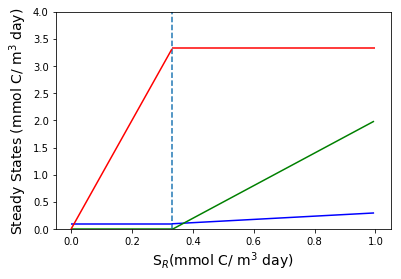

In [117]:
plt.rc_context({'axes.edgecolor':'black'})
plt.axvline(S_R1,linestyle='--')

#plotting R*
R2 = []
S_R = []
for resource in np.arange(S_R1,1,0.01):
    Rloc = (resource*eps*phi)/(mu*m_c)
    R2.append(Rloc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,R2,'blue')
plt.hlines(R1,0,S_R,'blue')
plt.xlabel('S$_{R}$(mmol C/ m$^{3}$ day)')
plt.ylabel('Steady States (mmol C/ m$^{3}$ day)')
plt.ylim(0,4)

#plotting P*
P1 = []
S_R = []
for resource in np.arange(0,S_R1,0.01):
    Ploc = resource/m_p
    P1.append(Ploc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,P1,'red')
plt.hlines(P2,S_R1,1,'red')

#plotting C*
C2 = []
S_R = []
for resource in np.arange(S_R1,1,0.01):
    Cloc = ((resource*eps)/m_c)-(m_p/phi)
    C2.append(Cloc)
    S_R.append(resource)
    #print(resource, Rloc)
plt.plot(S_R,C2,'green')
plt.hlines(C1,0,S_R1,'green')

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels

plt.savefig('steadystate_1prod.png')